# Clase 1
## 3- Convolución
### Teorema de convolución

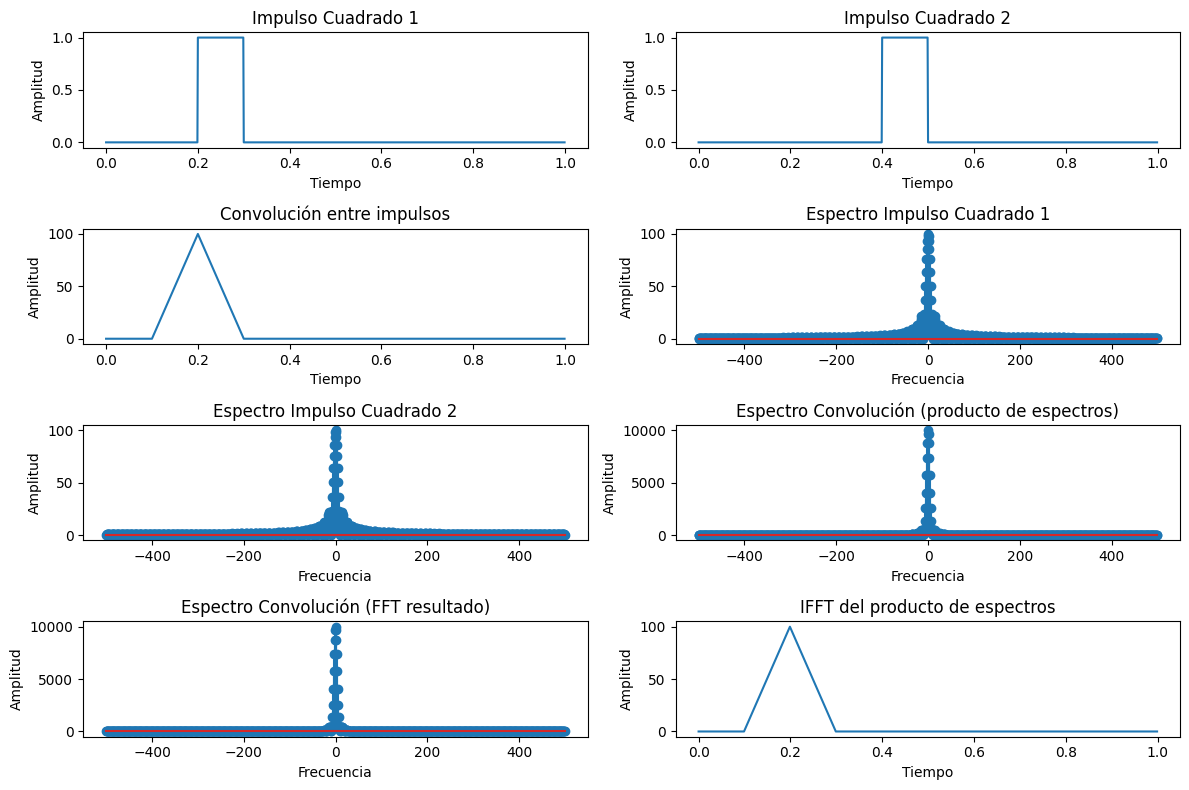

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.fft import fft, fftshift, fftfreq, ifft

# Parámetros de los impulsos cuadrados
t = np.linspace(0, 1, 1000, endpoint=False)  # Vector de tiempo
impulso1 = np.zeros_like(t)
impulso1[200:300] = 1  # Impulso cuadrado 1
impulso2 = np.zeros_like(t)
impulso2[400:500] = 1  # Impulso cuadrado 2

# Realizar la convolución de los impulsos
resultado_conv = np.convolve(impulso1, impulso2, mode='same')

# Calcular los espectros de los impulsos y del resultado de la convolución
espectro_impulso1 = (fft(impulso1))
espectro_impulso2 = (fft(impulso2))
espectro_conv = espectro_impulso1 * espectro_impulso2 #Por teorema de convolución
espectro_conv_fft = fftshift(fft(resultado_conv)) #FFT de la convolución en tiempo

# Graficar en el dominio del tiempo
plt.figure(figsize=(12, 8))

plt.subplot(4, 2, 1)
plt.plot(t, impulso1)
plt.title('Impulso Cuadrado 1')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 2, 2)
plt.plot(t, impulso2)
plt.title('Impulso Cuadrado 2')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 2, 3)
plt.plot(np.arange(len(resultado_conv))/1000, resultado_conv)
plt.title('Convolución entre impulsos')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Graficar en el dominio de la frecuencia
freqs = fftshift(fftfreq(len(t), 1/1000))

plt.subplot(4, 2, 4)
plt.stem(freqs, np.abs(fftshift(espectro_impulso1)))
plt.title('Espectro Impulso Cuadrado 1')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.subplot(4, 2, 5)
plt.stem(freqs, np.abs(fftshift(espectro_impulso2)))
plt.title('Espectro Impulso Cuadrado 2')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.subplot(4, 2, 6)
plt.stem(freqs, np.abs(fftshift(espectro_conv)))
plt.title('Espectro Convolución (producto de espectros)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.subplot(4, 2, 7)
plt.stem(freqs, np.abs((espectro_conv_fft)))
plt.title('Espectro Convolución (FFT resultado)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

senal_reconstruida = ifft(espectro_conv)

# Graficar la señal reconstruida en el dominio del tiempo


#plt.figure(figsize=(6, 4))
plt.subplot(4,2,8)
plt.plot(t, np.abs(fftshift(senal_reconstruida)))
plt.title('IFFT del producto de espectros')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')


# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()


### Convolución en imágenes

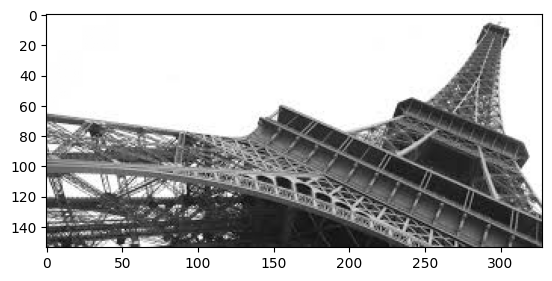

In [5]:
import scipy.signal as sig
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
myPath= ''
#En esa variable usar el path donde tengan los archivos

import cv2
img = plt.imread(myPath+'img/eiffel.png')

plt.imshow(img)

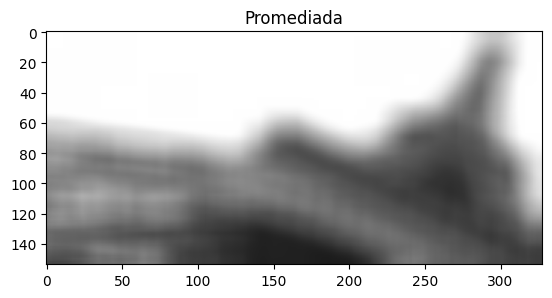

In [6]:
kernel_size = 25
kernel1 = np.ones((kernel_size,kernel_size))
karea= np.power(kernel_size,2)
kernel1.fill(0.04*25/karea)
img_k1 = cv2.filter2D(img,-1,kernel1)

#print (kernel1)
plt.title('Promediada')
plt.imshow(img_k1)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0. -1.  5. -1.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


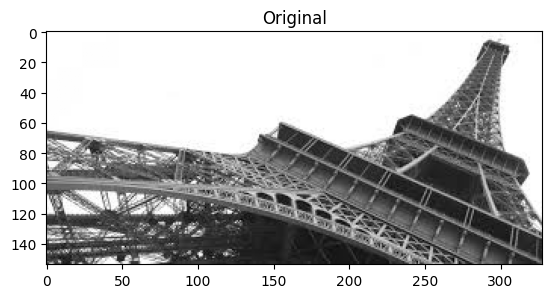

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x1e7f307fe90>, Text(0.5, 1.0, 'Enfoque'))

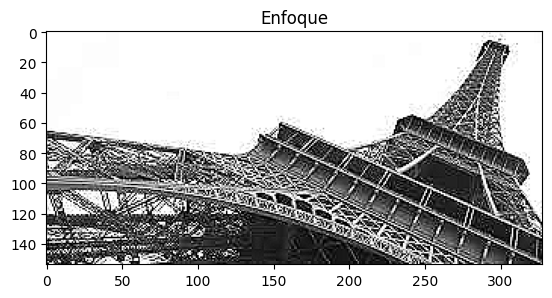

In [7]:
kernel2 = np.zeros((5,5))
kernel2[2,1:4].fill(-1)
kernel2[1:4,2].fill(-1)
kernel2[2,2]=5

print (kernel2)

img_k2 = cv2.filter2D(img,-1,kernel2)

plt.imshow(img),plt.title('Original')
plt.show()
plt.imshow(img_k2),plt.title('Enfoque')

### Reverberación por Convolución (Sonido)

In [9]:
input_rate,input_sig=scipy.io.wavfile.read(myPath+'audio_samples/JoeBonamassa.wav')
IR_rate,IR_sig=scipy.io.wavfile.read(myPath+'audio_samples/1a_marble_hall.wav')

rate=input_rate
con_len=-1
out_0=sig.fftconvolve(input_sig[:con_len,0],IR_sig[:con_len,0])
out_0=out_0/np.max(np.abs(out_0))
scipy.io.wavfile.write(myPath+'audio_samples/Result_1a_marble_hall.wav', rate ,out_0)
print ("done")

C:\Users\marti\AppData\Local\Temp\ipykernel_6956\942675198.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  input_rate,input_sig=scipy.io.wavfile.read(myPath+'audio_samples/JoeBonamassa.wav')


done
